# pauls speed dataing analysis

will include all the info here of my speed dateing data science analysis


### Required:

1. Python 2.7
2. numpy
3. pandas
4. matplotlib
5. seaborn

**the first thing to do is to ask good questions: below is a list of questions we are attempting to answer**

ranked by our team from easiest to hardest

**easy**


1. What People say they are looking for vs what they actually go for?

2. How important is race/age/field_of_study ETC in finding a match?

3. How does age difference effect future “date" selection - Daniel completed

4. Merging professions ? - what is this?

**medium**

5. Are you trying to hard? (did you primary goal change at the end) eg in the example where they were asking for what are you looking for “fun night out” vs “a relationship” and if having high expectations leads to a null result.

6. Measure the connection between interest groups and successful dates.


7. Order you meet people:  How the order affects the success of your match

8. The person that got the most matches, what attributes did they have? Best profile for men, best profile for women.

**hard**

9. Identify the interests that when aren’t shared there’s no date success (if a person did not share their like in sports & the other person likes sports, did this effect the outcome)

10. How does the speed dating process change mindset between the start & end for selecting partner features?

11. Your opinion of your own attributes vs how do you think others perceive you vs how others actually rate you - Is it best to be over-confident or under-confident in your own attributes - Daniel currently working on





I chose to go with "easy" question 1

ok

first things first,

lets break the task up into stages:

**easy question 1 is as follows:**
    
## Question: What People say they are looking for vs what they actually go for

lets try and answer it

## Step 1: Import relevant data science libraries:

In [27]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
import StringIO
import zipfile
import numpy as np
import pandas as pd # pandas
from scipy import stats, integrate
import matplotlib.pyplot as plt # module for plotting 
import seaborn as sns; sns.set_style("whitegrid")#sns.set(color_codes=True) 

## Step 2:  Data cleaning

first we need to import the relevant data, make sense of it (via the key document) & then clean relevant sections (columns (features)), (rows) etc

In [28]:
# read in the csv file into memory so we can start analyzing the data
df = pd.read_csv('/Users/Paul/Documents/git/speed-dating-analysis/speed-dating-analysis/data/Speed Dating Data.csv')

In [29]:
df.head

<bound method DataFrame.head of       iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1.0       0    1       1     1     10         7       NaN      4   
1       1   1.0       0    1       1     1     10         7       NaN      3   
2       1   1.0       0    1       1     1     10         7       NaN     10   
3       1   1.0       0    1       1     1     10         7       NaN      5   
4       1   1.0       0    1       1     1     10         7       NaN      7   
5       1   1.0       0    1       1     1     10         7       NaN      6   
6       1   1.0       0    1       1     1     10         7       NaN      1   
7       1   1.0       0    1       1     1     10         7       NaN      2   
8       1   1.0       0    1       1     1     10         7       NaN      8   
9       1   1.0       0    1       1     1     10         7       NaN      9   
10      2   2.0       0    3       1     1     10         3       NaN     10   
11      

ok, that is great, now to make sense of it all:

the first thing of note is that not all data is created equal. The speed dateing data was collected from a series of events from 2002 to 2004 - each event having slight variations from each other. 

For example in some of the events participants got to rate each other on a scale of 1 to 10. in other events participants got 100 points which they had to allocate to predetermined partner attributes (100 points to allocate to desirable partner attributes).

we have to normalize this data so that in most cases it uses the same scale and therfore becomes usable.

### cleaning ctd

Each speed dating event was called a "wave" , for example wave 6, was speed dating event 6.



**lets analyze waves 6-9: as these use the 100 point system as apposed to a 1 to 10 scale**


In [30]:
startWave = 6
endWave = 9




dfwaves6_9 = df.query('wave >= @startWave and wave <= @endWave')

#dfwaves6_9.head()

print dfwaves6_9


      iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
1846  132   1.0       0    1       1     6      5         2       2.0      5   
1847  132   1.0       0    1       1     6      5         2       2.0      2   
1848  132   1.0       0    1       1     6      5         2       2.0      3   
1849  132   1.0       0    1       1     6      5         2       2.0      4   
1850  132   1.0       0    1       1     6      5         2       2.0      1   
1851  133   2.0       0    3       1     6      5         3       3.0      1   
1852  133   2.0       0    3       1     6      5         3       3.0      3   
1853  133   2.0       0    3       1     6      5         3       3.0      4   
1854  133   2.0       0    3       1     6      5         3       3.0      5   
1855  133   2.0       0    3       1     6      5         3       3.0      2   
1856  134   3.0       0    5       1     6      5         4       4.0      2   
1857  134   3.0       0    5       1    

on seconds thoughts lets move to getting some insights as fast as possible - to do this lets remove the anomaly wave 6-9 data

In [31]:
#df_waves_100ps is short for df waves 100 point system
df_waves_100ps = df.query('wave < @startWave or wave > @endWave')

#lets save this dataframe for a quick visual inspection
df_waves_100ps.to_csv("df_waves_100ps.csv", sep=',', encoding='utf-8')

#opening up the generated csv file for a quick visual inspection
#confirms that the query method succesfully removed the undesired waves 6-9

#However this step is not needed if you read the notes in the section below


# OLD TEST CODE BELOW :: SCHEDULED FOR DELETION

#for playerIDMedianSalary in SeriesOf_playerMedian:

#testVar = 7

#for index, row in df.iterrows():
#    if row['wave'] < 6 | row['wave'] > 9:
#        print "test fail"
#        print row['wave']

UnicodeDecodeError: 'utf8' codec can't decode byte 0x8e in position 25876: invalid start byte

As it turned out the data had already been normalized! A quick visual inspection of the data confirms this!

More data cleaning may be required, but for now, lets roll with what we have.

## Step 3:  Identify our target variables



So, the question we are trying to answer is: **"What People say they are looking for vs what they actually go for"**

Lets identify from the accompanying key word document which variables are what.

### What People say they are looking for - variables

**imprace** - How important is it to you (on a scale of 1-10) that a person you date be of the same racial/ethnic background?

**imprelig** - How important is it to you (on a scale of 1-10) that a person you date be of the same religious background?

**exphappy:** - Overall, on a scale of 1-10, how happy do you expect to be with the people you meet 
during the speed-dating event?

**expnum:** - Out of the 20 people you will meet, how many do you expect will be interested in dating you? 

"We want to know what you look for in the opposite sex. Please rate the importance of the following attributes in a potential date:"

**attr1_1** - Attractive

**sinc1_1** - Sincere

**intel1_1** - Intelligent

**fun1_1** - fun

**amb1_1** - Ambitious

**shar1_1** - Has shared interests/hobbies

### What people actually go for - variables

The main way to determine what people actually go for is how individuals rated others directly after a speed date:

these were given by a form (shown below) that people fulled out straight after completeing a speed date

the main thing to note here however: **is that the variables are on a scale from 1-10.**

the variables off their score sheet are the following:

the indiviual rated the other on:

**attr** - attractive

**sinc** - Sincerity

**intel** - Intelligence

**fun** - was the interaction / other person considered fun?

**amb** - was the other person consired ambitious?

**shar** - did they have shared interests with the other person?





## Step 4:  exploratory data analysis

So in order to answer the question, which again is:

**"What People say they are looking for vs what they actually go for"**

We have to do the following:

1. Determine what people say they go for
2. Figure out a way to determine what they actually go for.

### Determining what people 'say' they are going for.

Time for some exploratory data analysis. 

We have two tools that we could use to detemine what people say they would like to for.

1. Visualizations
2. Summary statisics

First, lets figure out the best way to determine how to visualize our data.

We need to determine if our data is "skewed" or not. That is to say, biased in some way. Lets use histograms and analyze each each attribute (attractive, sincere, intelligent, fun etc) on a case by case basis. After this we can determine which set of summary statisics to use.


In [32]:
import math



#cleaning & rearranging the data so that it can be plotted...

#for referance, here our variable names mean the following:

#attr - Attractive
#sinc - Sincere
#intel - Intelligent
#fun - fun
#amb - Ambitious
#sharb- Has shared interests/hobbies


#converting from a pandas series to a numpy array & also droppong all NaN values

attr = np.array(df['attr1_1'].dropna().values)
sinc = np.array(df['sinc1_1'].dropna().values)
intel = np.array(df['intel1_1'].dropna().values)
fun = np.array(df['fun1_1'].dropna().values)
amb = np.array(df['amb1_1'].dropna().values)
shar = np.array(df['shar1_1'].dropna().values)

np.set_printoptions(threshold=15)

#print attr

attributes = [attr,sinc,intel,fun,amb,shar]

#array of the names above...
#headers_Old = ['attr','sinc','intel','fun','amb','shar']
headers = ['Attractive','Sincere','Intelligent','fun','Ambitious','Has shared interests/hobbies']

#check to see that our data cleaning above worked and no Nans exist:

for k in attr:
    
    if math.isnan(k) == True:
        print 'nan found'


print 'nan checking complete'
print ''


#counting the total number of entries for each attribute

for j in attributes:
    
    count = np.count_nonzero(j)
                             
    print '',j, '  contains ', count,' elements'
    


nan checking complete

 [ 15.  15.  15. ...,  70.  70.  70.]   contains  8278  elements
 [ 20.  20.  20. ...,   0.   0.   0.]   contains  8091  elements
 [ 20.  20.  20. ...,  15.  15.  15.]   contains  8216  elements
 [ 15.  15.  15. ...,  15.  15.  15.]   contains  8257  elements
 [ 15.  15.  15. ...,   0.   0.   0.]   contains  7454  elements
 [ 15.  15.  15. ...,   0.   0.   0.]   contains  7544  elements



remember: in the speed dating exercise, you only had 100 points to assign to each attribute


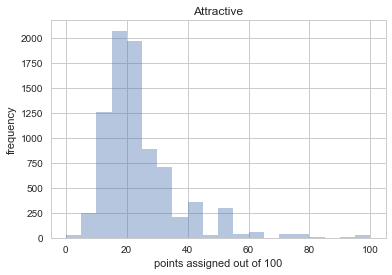

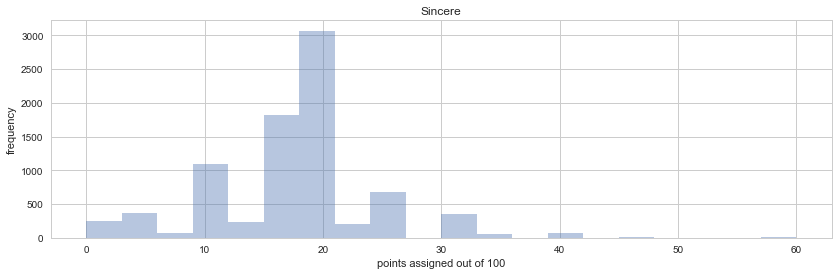

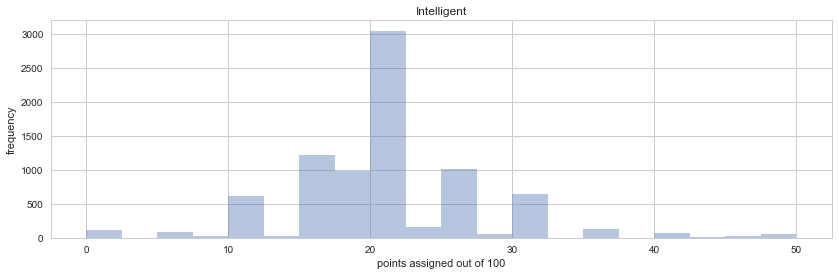

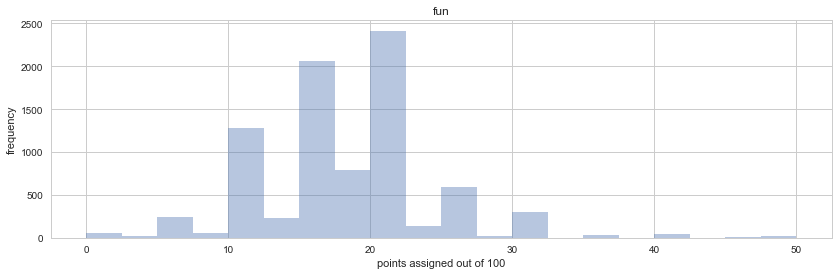

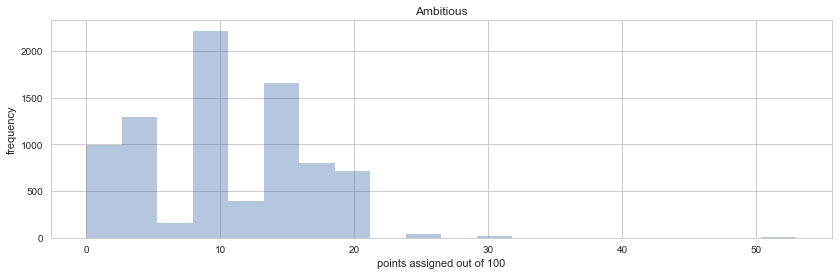

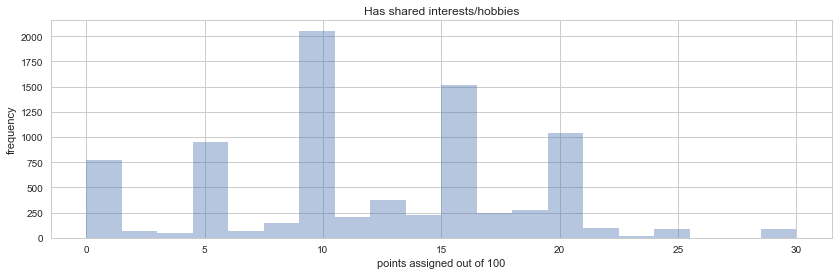

In [33]:
#now plot our histograms

#we know that seaborn uses <type 'numpy.ndarray'>

# now loop through the rest of the attributes & plot them
z = 0

print ""
print "remember: in the speed dating exercise, you only had 100 points to assign to each attribute"


for index_of_attr in attributes:

    ax = sns.distplot(index_of_attr, bins = 20, kde=False)
    
    plt.rcParams['figure.figsize']=(14,4)
    
    plt.title(headers[z])
    # Set x-axis label
    plt.xlabel('points assigned out of 100')
    # Set y-axis label
    plt.ylabel('frequency')
    
    

    plt.show()

    z += 1

ok from the above visualizations, it could be said that the distributions for the attr,sinc,intel,fun,amb & shar attributes are right skewed (the 'tail' of the data is skewed to the right).

 for skewed datasets it is better to use the median ( as apposed to the mean) as our measure of the 'average value' from the dataset in question
 
 as can be seen in the image below,

<img src="http://www.statisticshowto.com/wp-content/uploads/2014/02/pearson-mode-skewness.jpg">

so we no that we need to use the **median as our measure of spread**, lets use the summary statistic **median** to look further into our data


In [34]:
attributes_m = []

print type(attributes_m)

tempvar = 0
scount = 0

for s in attributes:
    attributes_m.append(np.median(s))
    print np.median(s),': is the median for the', headers[scount], 'attribute'
    tempvar = tempvar + np.median(s)
    scount += 1

print ''
print tempvar,' is the total (median) points assigned when summing all attribute categories'



<type 'list'>
20.0 : is the median for the Attractive attribute
18.18 : is the median for the Sincere attribute
20.0 : is the median for the Intelligent attribute
18.0 : is the median for the fun attribute
10.0 : is the median for the Ambitious attribute
10.64 : is the median for the Has shared interests/hobbies attribute

96.82  is the total (median) points assigned when summing all attribute categories


a simple bar plot to help summarize our findings visually

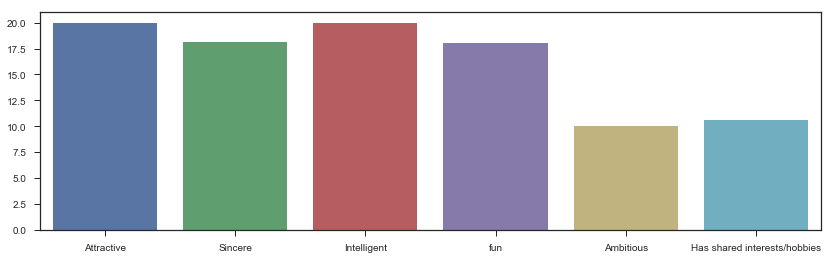

In [71]:
x = headers
y = attributes_m


ax = sns.barplot(x, y)

lets finish off by doing one last visual inspection of the data, a box & whisker plot

In [35]:

df_temp = pd.DataFrame(attributes)
df_temp = df_temp.transpose()
df_temp.columns = headers

print df_temp

tips = sns.load_dataset("tips")

#print tips

print type(df_temp)

#ax = sns.boxplot(x="day", y="attr", data=df_temp)

      Attractive  Sincere  Intelligent   fun  Ambitious  \
0           15.0     20.0         20.0  15.0       15.0   
1           15.0     20.0         20.0  15.0       15.0   
2           15.0     20.0         20.0  15.0       15.0   
3           15.0     20.0         20.0  15.0       15.0   
4           15.0     20.0         20.0  15.0       15.0   
5           15.0     20.0         20.0  15.0       15.0   
6           15.0     20.0         20.0  15.0       15.0   
7           15.0     20.0         20.0  15.0       15.0   
8           15.0     20.0         20.0  15.0       15.0   
9           15.0     20.0         20.0  15.0       15.0   
10          45.0      5.0         25.0  20.0        0.0   
11          45.0      5.0         25.0  20.0        0.0   
12          45.0      5.0         25.0  20.0        0.0   
13          45.0      5.0         25.0  20.0        0.0   
14          45.0      5.0         25.0  20.0        0.0   
15          45.0      5.0         25.0  20.0        0.0 

This is a crazy plot, called a violin plot that I discovered whilst stack exchanging, worth showing here to compare the different attributes

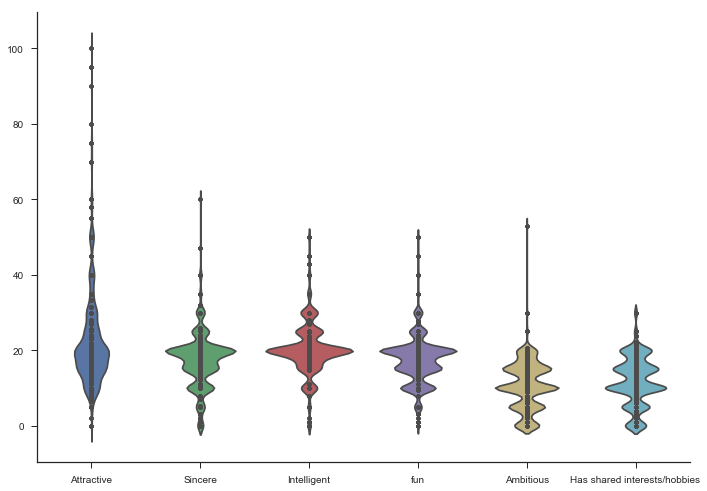

In [36]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.violinplot(data=df_temp, inner="points", ax=ax)    
sns.despine()

lets also subset the data by selecting only the people with matches into a new dataframe
we can use this dataset for what people say they want, & what they actually go for

#### initial insight

It can be seen from the above violin plot & the histograms that most people assigned 20 points to each attribute sequentially.

One possibility is that as people were fulling out the form they assigned 20 points to the categories

1. Attractive
2. Sincere
3. Intelligent
4. Fun

as these were the order that these attributes appeared sequentially on the original dating questionaire form.  as seen in the image below:

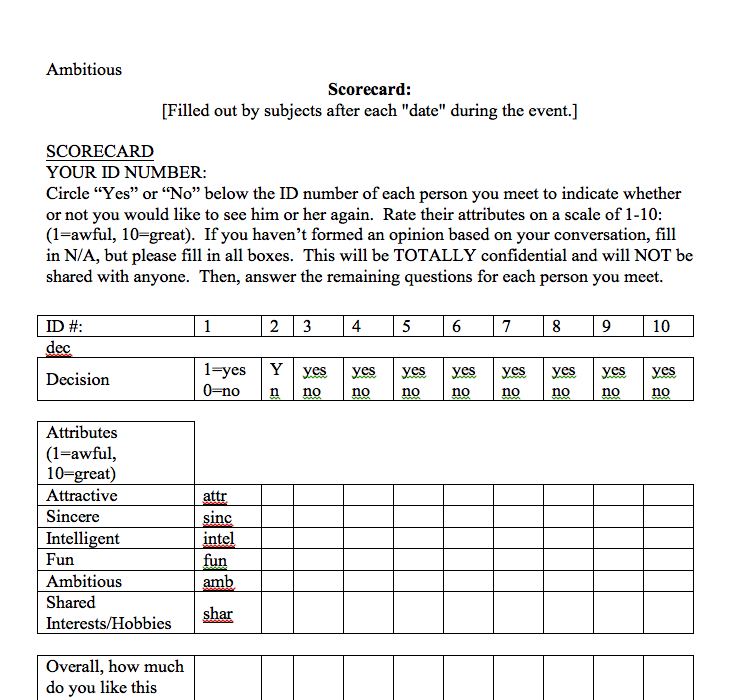


**this would leave them with 20 remain points to be assigned to the remaining two categories** which were:

 **ambitious**
 
 **shared interest**

and so the last 20 points were split rougly evenly (10 points each) between  these last two categories potentially because they had no other options (or would have had to rearrange their original distribution of points between the different categories)

Of course another explanation could be that people simply did not value **ambition** or **shared interes** as a quality in a partner.

### Determining what people actually go for

now for the (much) harder part. Determining what people actually go for.

we need to look at every individual in our dataset and analyize who they said "yes" to potentially dating

so we need to "subset" our data for every person they said yes to, then analyze the "yes" people's attributes

**iid** is the unique variable assigned to each indiviual that we can use to analyze each individual seperately,

lets write a python function that returns a dataframe of the people that the individual said yes to, and then perform an analysis on this data

In [64]:
def numberofyestoID(df,idlocal):
    
    df_ofPeopleThatSaidYesto_iid = df[(df['match'] == 1) & (df['pid'] == idlocal)] #df[(df[])]
    
    
    return df_ofPeopleThatSaidYesto_iid

In [65]:
#lets examine participant number 45

participantNum = 45

df_matchesToOutIID = numberofyestoID(df, participantNum)

df_matchesToOutIID

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
221,22,2.0,0,3,2,2,16,7,NaN,4,...,7.0,8.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN
237,23,3.0,0,5,2,2,16,3,NaN,1,...,5.0,7.0,8.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN
333,29,9.0,0,17,2,2,16,9,NaN,6,...,7.0,9.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
429,35,15.0,0,29,2,2,16,17,NaN,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


below is a list of matches that IID 1 got:

Lets now examine this a little bit further & see what attriubutes it was that they saw in him/her:

We know that the varibles for how others perceived are: attr,sinc, intel, fun, amb, shar.

lets examine only these features from our subject above:

In [66]:
print 'particpant # ',participantNum,' matches were the following:'

#note that the dec_o column is if the partner of the individual said 'yes' I would like to go on a date with our iid

# a match was determined if they both said yes

df_matches_properties = df_matchesToOutIID[['pid', 'match','dec_o','attr','sinc','intel','fun','amb','shar']]
df_matches_properties

particpant #  45  matches were the following:


,pid,match,dec_o,attr,sinc,intel,fun,amb,shar
221,45.0,1,1,6.0,7.0,7.0,4.0,6.0,6.0
237,45.0,1,1,6.0,7.0,7.0,6.0,7.0,5.0
333,45.0,1,1,6.0,8.0,7.0,4.0,7.0,2.0
429,45.0,1,1,7.0,8.0,9.0,7.0,8.0,9.0


lets determine the mean of these attributes to see how they rate against each other

In [67]:
attr_mean = df_matches_properties['attr'].mean()
sinc_mean = df_matches_properties['sinc'].mean()
intel_mean = df_matches_properties['intel'].mean()
fun_mean = df_matches_properties['fun'].mean()
amb_mean = df_matches_properties['amb'].mean()
shar_mean = df_matches_properties['shar'].mean()

attributes_of_iid = [attr_mean, sinc_mean, intel_mean, fun_mean, amb_mean, shar_mean]



print 'the mean of attr is',attr_mean
print 'the mean of sinc is',sinc_mean
print 'the mean of intel is',intel_mean
print 'the mean of fun is',fun_mean
print 'the mean of amb is',amb_mean
print 'the mean of shar is',shar_mean

the mean of attr is 6.25
the mean of sinc is 7.5
the mean of intel is 7.5
the mean of fun is 5.25
the mean of amb is 7.0
the mean of shar is 5.5


displayed graphically, the means look as follows:



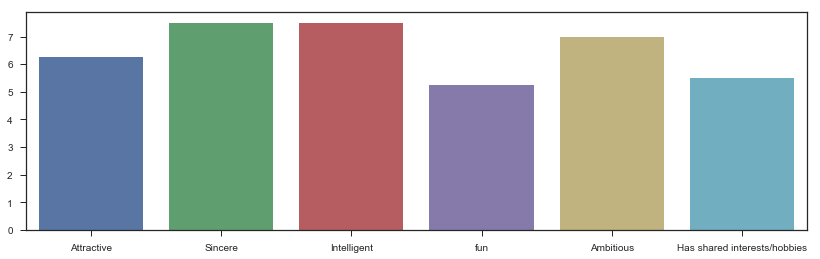

In [68]:
x = headers
y = attributes_of_iid


ax = sns.barplot(x, y)

lets now perform the same analysis above on everyone that said 'yes' to going on a date with someone:

In [69]:
df_ofPeopleThatSaidYesto_iid = df[(df['match'] == 1) ] 

df_matches_properties =  df_ofPeopleThatSaidYesto_iid[['match','pid','attr','sinc','intel','fun','amb','shar']]

#print df_matches_properties

attr_median = df_matches_properties['attr'].median()
sinc_median = df_matches_properties['sinc'].median()
intel_median = df_matches_properties['intel'].median()
fun_median = df_matches_properties['fun'].median()
amb_median = df_matches_properties['amb'].median()
shar_median = df_matches_properties['shar'].median()

attributes_of_iid = [attr_median, sinc_median, intel_median, fun_median, amb_median, shar_median]
attributes_of_iid_np = np.array(attributes_of_iid)

print attributes_of_iid_np

print 'the median of attr is',attr_median
print 'the median of sinc is',sinc_median
print 'the median of intel is',intel_median
print 'the median of fun is',fun_median
print 'the median of amb is',amb_median
print 'the median of shar is',shar_median

[ 7.  8.  8.  8.  7.  7.]
the median of attr is 7.0
the median of sinc is 8.0
the median of intel is 8.0
the median of fun is 8.0
the median of amb is 7.0
the median of shar is 7.0


#### plotting the data of everyone that said yes to a potential date with eveyone else: in a bar chart:

.

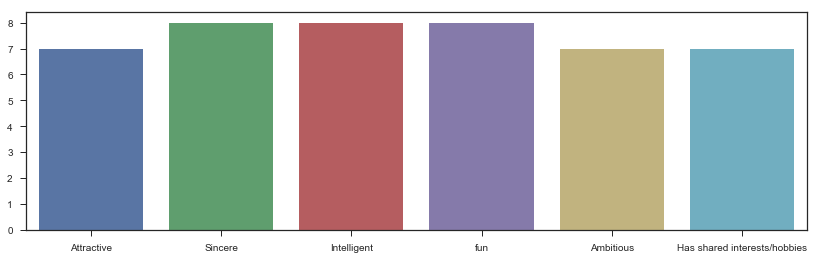

In [70]:
x = headers
y = attributes_of_iid

ax = sns.barplot(x, y)